## Tutoral 2 Question 3

In [1]:
# import all the libraries
import torch
import torch.nn as nn

from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set parameters for training
no_epochs = 100
lr = 0.01

seed = 10
np.random.seed(seed)

In [3]:
# define dataset
X, y = make_blobs(n_samples=100, n_features=3, centers=2, cluster_std=5, random_state=1)

# size of the dataset
print(X.shape, y.shape)

# print first few examples
for i in range(5):
	print(X[i], y[i])

(100, 3) (100,)
[  5.82704597  -8.69737967 -14.86660705] 1
[ -5.95713961   6.15921976 -16.55912956] 0
[-7.16265579 10.13010842 -5.4897589 ] 0
[-5.19652244 -6.84653722 -9.28479932] 1
[ 0.9050892   2.91602569 -7.55512177] 0


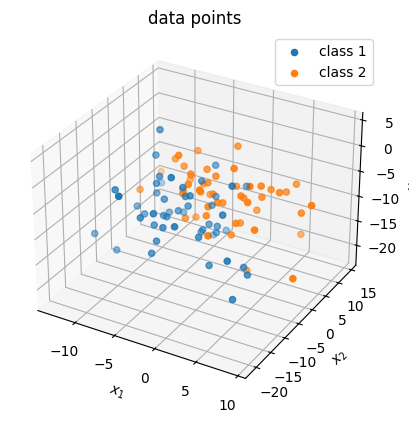

In [4]:
# plot the data belonging to two classes
fig = plt.figure(1)
ax = plt.axes(projection = '3d')
ax.scatter(X[y==1,0], X[y==1,1], X[y==1,2],'b^', label='class 1')
ax.scatter(X[y==0,0], X[y==0,1], X[y==0,2], 'ro', label='class 2')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title('data points')
ax.legend()
plt.show()

In [5]:
# Create a logistic neuron class
class Logistic():
  def __init__(self):
    self.w = torch.tensor(0.05*np.random.rand(3), dtype=torch.double, requires_grad=True)
    self.b = torch.tensor(0., dtype=torch.double, requires_grad=True)

  def __call__(self, x):
    u = torch.matmul(torch.tensor(x), self.w) + self.b
    logits = torch.sigmoid(u)
    
    return logits

In [6]:
# compute binary cross-entropy loss
loss = nn.BCELoss()

In [7]:
# Train the model
def train(model, inputs, targets, learning_rate):
  logits = model(inputs)

  loss_ = loss(logits, torch.tensor(targets, dtype=torch.double))
  err = torch.sum(torch.not_equal(logits > 0.5, torch.tensor(targets)))
  
  loss_.backward()

  with torch.no_grad():
      model.w -= learning_rate * model.w.grad
      model.b -= learning_rate * model.b.grad

  model.w.grad = None
  model.b.grad = None
    
  return loss_, err

In [8]:
# create a logisti neuron objective
model = Logistic()

entropy, err = [], []

# train the model over 100 epochs
for epoch in range(100):
  
  entropy_, err_ = train(model, X, y, lr)
    
  # for first epoch, print values
  if (epoch == 0):
    with torch.no_grad():
        print('entropy:{}'.format(entropy_))
        print('error:{}'.format(err_))
        print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

  if epoch%5 == 4:
      print('Epoch %2d:  entropy: %2.5f, error: %d'%(epoch+1, entropy_.detach().numpy(), err_.detach().numpy()))

  entropy.append(entropy_.detach().numpy()), err.append(err_.detach().numpy())

entropy:0.7195636156895534
error:50
w: [ 0.03154944 -0.02762317  0.02623118], b: 0.0008848832691765634
Epoch  5:  entropy: 0.49854, error: 13
Epoch 10:  entropy: 0.41048, error: 14
Epoch 15:  entropy: 0.37283, error: 14
Epoch 20:  entropy: 0.35237, error: 13
Epoch 25:  entropy: 0.33975, error: 13
Epoch 30:  entropy: 0.33134, error: 13
Epoch 35:  entropy: 0.32542, error: 13
Epoch 40:  entropy: 0.32110, error: 14
Epoch 45:  entropy: 0.31786, error: 14
Epoch 50:  entropy: 0.31536, error: 14
Epoch 55:  entropy: 0.31341, error: 14
Epoch 60:  entropy: 0.31185, error: 14
Epoch 65:  entropy: 0.31060, error: 14
Epoch 70:  entropy: 0.30958, error: 14
Epoch 75:  entropy: 0.30874, error: 14
Epoch 80:  entropy: 0.30805, error: 14
Epoch 85:  entropy: 0.30747, error: 14
Epoch 90:  entropy: 0.30699, error: 14
Epoch 95:  entropy: 0.30658, error: 14
Epoch 100:  entropy: 0.30624, error: 14


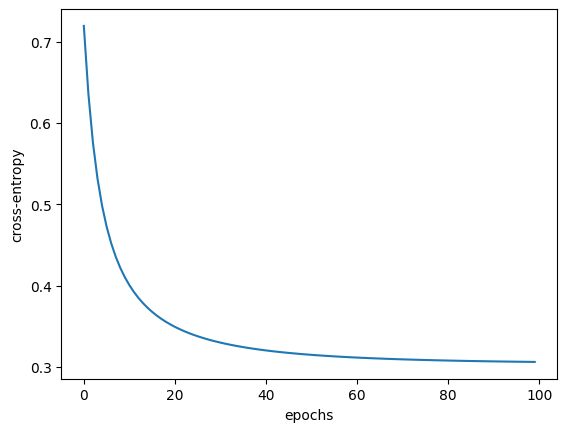

In [9]:
# print cross-entropy vs epochs
plt.figure(2)
plt.plot(range(no_epochs), entropy)
plt.xlabel('epochs')
plt.ylabel('cross-entropy')
plt.show()

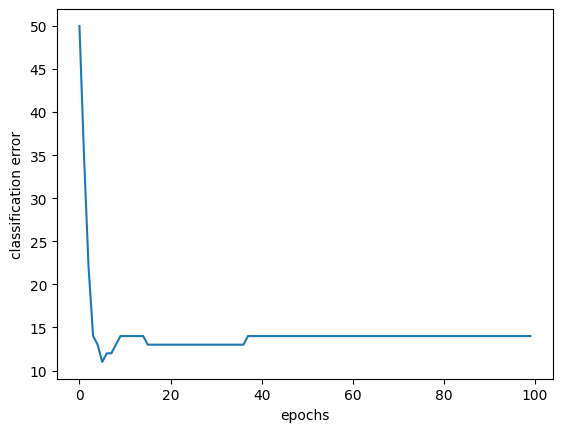

In [10]:
# print classification error vs epochs
plt.figure(3)
plt.plot(range(no_epochs), np.array(err))
plt.xlabel('epochs')
plt.ylabel('classification error')
plt.show()

In [11]:
# print learned weights and error
print('w: %s, b: %s'%(model.w.detach().numpy(), model.b.detach().numpy()))
print('entropy: %2.5f, error: %d'%(entropy[-1], err[-1]))

w: [-0.07863051 -0.38637461  0.04367386], b: -0.005283838100787615
entropy: 0.30624, error: 14


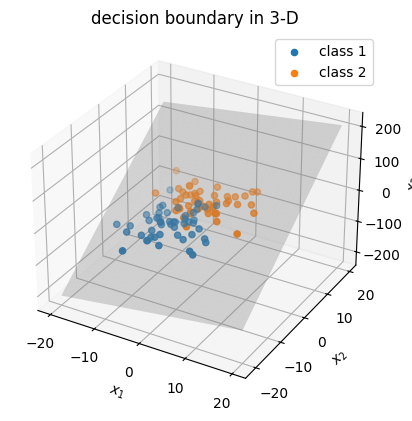

In [12]:
# plot the decision boundary in 3D
fig = plt.figure(1)
ax = plt.axes(projection = '3d')
ax.scatter(X[y==1,0], X[y==1,1], X[y==1,2],'b^', label='class 1')
ax.scatter(X[y==0,0], X[y==0,1], X[y==0,2], 'ro', label='class 2')
x1, x2 = np.meshgrid(np.arange(-20, 20, 0.1),np.arange(-20, 20, 0.1))
w_, b_ = model.w.detach().numpy(), model.b.detach().numpy()
x3 = -(w_[0]*x1 + w_[1]*x2 + b_)/w_[2]
decision_boundary = ax.plot_surface(x1, x2, x3, color = 'gray', alpha=0.3)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title('decision boundary in 3-D')
ax.legend()
plt.show()

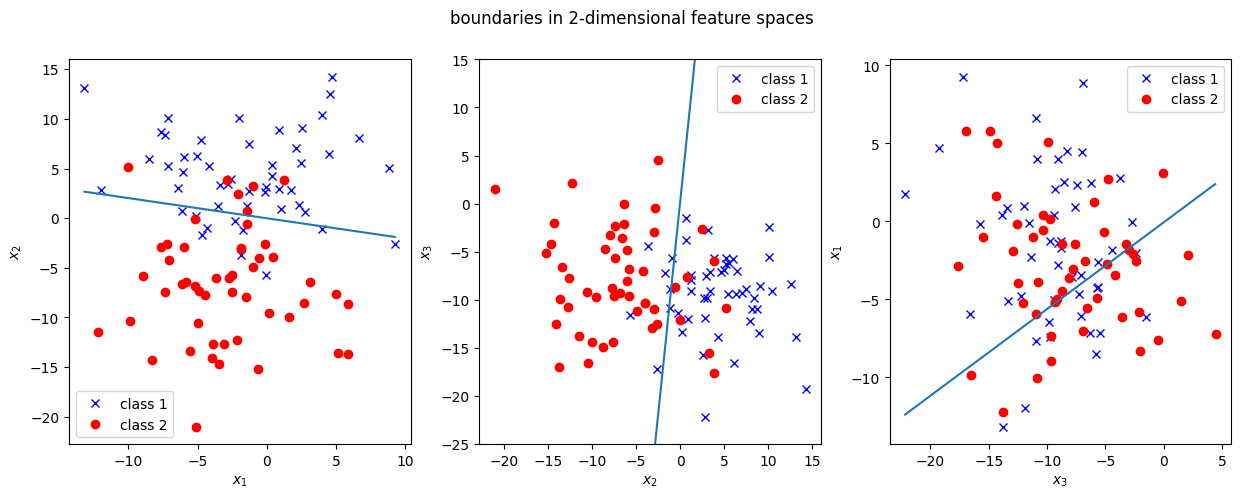

In [13]:
# plot the decision boundary in 2D spaces

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('boundaries in 2-dimensional feature spaces')

x1 = np.arange(min(X[:,0]), max(X[:,0]), 0.1)
x2 = -(x1*model.w.detach().numpy()[0] + model.b.detach().numpy())/model.w.detach().numpy()[1]
ax1.plot(X[y==0,0], X[y==0,1],'bx', label ='class 1')
ax1.plot(X[y==1,0],X[y==1,1],'ro', label='class 2')
ax1.plot(x1, x2, '-')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
#plt.title('decision boundary')
ax1.legend()

x2 = np.arange(min(X[:,1]), max(X[:,1]), 0.1)
x3 = -(x2*model.w.detach().numpy()[1] + model.b.detach().numpy())/model.w.detach().numpy()[2]
ax2.plot(X[y==0,1],X[y==0,2],'bx', label ='class 1')
ax2.plot(X[y==1,1],X[y==1,2],'ro', label='class 2')
ax2.plot(x2, x3, '-')
ax2.set_xlabel('$x_2$')
ax2.set_ylabel('$x_3$')
ax2.set_ylim(-25, 15)
#plt.title('decision boundary')
ax2.legend()

x3 = np.arange(min(X[:,2]), max(X[:,2]), 0.1)
x1 = -(x3*model.w.detach().numpy()[2] + model.b.detach().numpy())/model.w.detach().numpy()[0]
ax3.plot(X[y==0,2], X[y==0,0],'bx', label ='class 1')
ax3.plot(X[y==1,2],X[y==1,0],'ro', label='class 2')
ax3.plot(x3, x1, '-')
ax3.set_xlabel('$x_3$')
ax3.set_ylabel('$x_1$')
#plt.title('decision boundary')
ax3.legend()
plt.show()